## Requeriments

In [1]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns

import statsmodels.api         as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

/pip_envs/Debuggers3.6/lib/python3.6/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Uploading data (dataXid)

In [2]:
df = pd.read_csv("/mnt/workstation/data/dataXid.csv")
#PCA = pd.read_csv("/mnt/workstation/data/PCA.csv")

In [3]:
id_cli = df['id_cli']
df = df.drop(['id_cli'], axis=1)

In [9]:
features = pd.DataFrame(df.dtypes)
features.columns = ['type']
features_f = features[features['type'] == 'float64'].index
features_o = features[features['type'] == 'object'].index
features_i = features[features['type'] == 'int64'].index
features_b = features[features['type'] == 'bool'].index

In [10]:
df[features_o].describe(include='all').T

,count,unique,top,freq
genero,1047955,2,M,530231
estado_civil,1047955,5,SOLTERO,580947
profesion,1047955,79,OTROS,597636
ocupacion,1047955,10,Empleado,664807
ciudad_residencia,1047955,1434,BOGOTA D.C.,266580
rep_calif_cred,1047955,8,A,314708


In [56]:
max(df['ind_mora_vigente'])

1

## Correlation

Text(0.5, 1.0, 'Correlación de variables numericas')

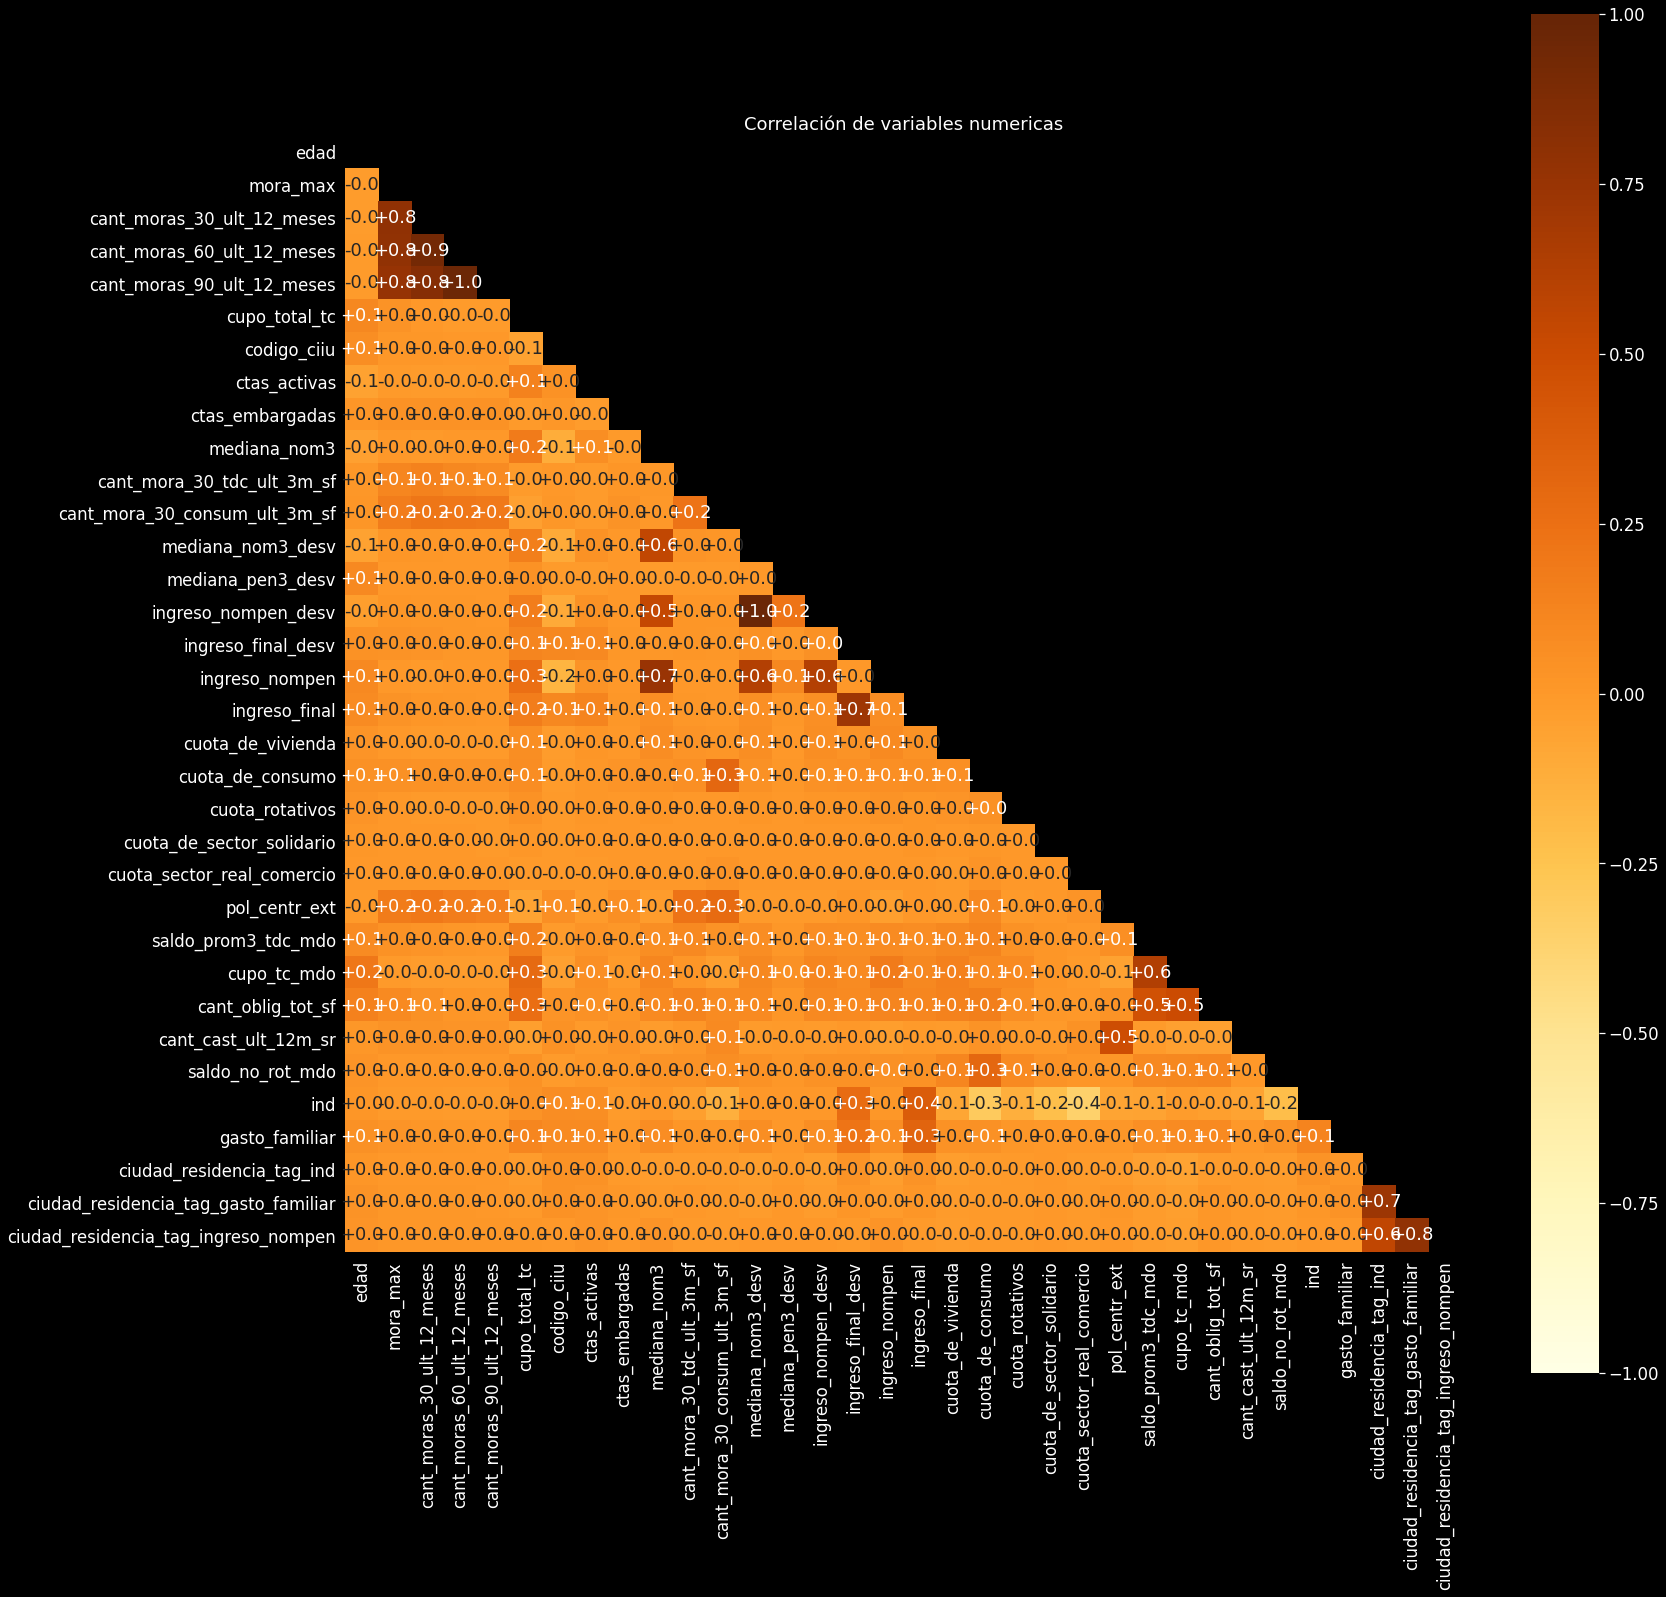

In [133]:
#plt.rcParams.update({'font.size': 13})
#compute correlation matrix
df_correlations = df[list(features_f)].corr()

#mask the upper half for visualization purposes
mask = np.zeros_like(df_correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask and correct aspect ratio
sns.set(font_scale=1.5)
plt.style.use("dark_background")
plt.figure(figsize= (25,25))
sns.heatmap(df_correlations, mask=mask, cmap="YlOrBr",#"RdYlBu", 
    annot=True, square=True,
    vmin=-1, vmax=1,
    fmt="+.1f")
plt.title("Correlación de variables numericas")

In [8]:
sorted_pairs = df_correlations.unstack().sort_values(kind="quicksort", ascending = False)
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]
strong_pairs = strong_pairs[abs(sorted_pairs) < 1]
strong_pairs = pd.DataFrame(strong_pairs)
strong_pairs.columns = ['Correlation']
strong_pairs.drop_duplicates(subset=['Correlation'],inplace = True)
strong_pairs

Correlation
mediana_nom3_desv                    ingreso_nompen_desv                      0.973692
cant_moras_60_ult_12_meses           cant_moras_90_ult_12_meses               0.962090
                                     cant_moras_30_ult_12_meses               0.924685
cant_moras_30_ult_12_meses           cant_moras_90_ult_12_meses               0.842765
                                     mora_max                                 0.796025
ciudad_residencia_tag_ingreso_nompen ciudad_residencia_tag_gasto_familiar     0.784856
cant_moras_60_ult_12_meses           mora_max                                 0.782859
cant_moras_90_ult_12_meses           mora_max                                 0.762913
ingreso_nompen                       mediana_nom3                             0.745418
ciudad_residencia_tag_gasto_familiar ciudad_residencia_tag_ind                0.727441
ingreso_final                        ingreso_final_desv                       0.724192
cupo_tc_mdo                          saldo_prom3_tdc_mdo                      0.629094
ingreso_nompen                       ingreso_nompen_desv                      0.622740
mediana_nom3_desv                    ingreso_nompen                           0.618064
ciudad_residencia_tag_ind            ciudad_residencia_tag_ingreso_nompen     0.556201
mediana_nom3_desv                    mediana_nom3                             0.550131
ingreso_nompen_desv                  mediana_nom3                             0.531492
cupo_tc_mdo                          cant_oblig_tot_sf                        0.503952

In [11]:
to_delete = ['mediana_pen3_desv',
             'cant_moras_60_ult_12_meses',
            'cant_moras_90_ult_12_meses',
            'cant_moras_30_ult_12_meses',
            'ingreso_nompen',
            'ingreso_final_desv',
            'mediana_nom3',
            'mediana_nom3_desv',
            'saldo_prom3_tdc_mdo',
            'cant_oblig_tot_sf',
            'estado_civil',
            'profesion',
             'ocupacion',
             'ciudad_residencia',
             'genero',
             'rep_calif_cred'
            ]

In [12]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None
df.rename(columns = {'genero_tag':'genero_num'},inplace=True)
indices = df.columns.str.extract(r"(_gasto_familiar)").dropna().index
df_var = df.iloc[:,indices]
indices2 = df.columns.str.extract(r"(tag)").isna()[0].to_list()
df_indices2 = df.loc[:,indices2]
df_final = pd.concat([df_indices2,df_var],axis=1)
df_final.head(30)

,edad,mora_max,cant_moras_30_ult_12_meses,cant_moras_60_ult_12_meses,cant_moras_90_ult_12_meses,cupo_total_tc,codigo_ciiu,ctas_activas,ctas_embargadas,mediana_nom3,genero,estado_civil,profesion,ocupacion,ciudad_residencia,rep_calif_cred,ind_mora_vigente,cartera_castigada,tenencia_tc,tiene_consumo,tiene_crediagil,tiene_ctas_activas,tiene_ctas_embargadas,pension_fopep,tiene_cred_hipo_1,tiene_cred_hipo_2,cant_mora_30_tdc_ult_3m_sf,cant_mora_30_consum_ult_3m_sf,mediana_nom3_desv,mediana_pen3_desv,ingreso_nompen_desv,ingreso_final_desv,ingreso_nompen,ingreso_final,cuota_de_vivienda,cuota_de_consumo,cuota_rotativos,cuota_de_sector_solidario,cuota_sector_real_comercio,pol_centr_ext,saldo_prom3_tdc_mdo,cupo_tc_mdo,cant_oblig_tot_sf,cant_cast_ult_12m_sr,saldo_no_rot_mdo,ind,gasto_familiar,genero_num,estado_civil_tag_gasto_familiar,profesion_tag_gasto_familiar,ocupacion_tag_gasto_familiar,ciudad_residencia_tag_gasto_familiar,rep_calif_cred_tag_gasto_familiar
0,36.0,0.0,0.0,0.0,0.0,0.000000e+00,10.0,1.0,0.0,0.0,M,DIVORCIADO,TECNOLOGIA SISTEMAS,Empleado,CALI,C,1,1,0,0,0,1,0,0,0,0,0.000000,0.000000,4.819967e+05,0.000000,4.918474e+05,1.008436e+05,1.012144e+06,1.244439e+06,0.0,1.043989e+05,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.00000,9.878612e+05,5.619513e+05,1.792900e+05,2,3,7,6,928.0,5
1,33.0,3.0,0.0,0.0,0.0,0.000000e+00,10.0,1.0,0.0,0.0,F,UNION LIBRE,VETERINARIA,Independiente,GARZON,D,1,1,0,0,0,1,0,0,0,0,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,2.263888e+06,0.000000e+00,6.297243e+06,0.0,6.056656e+04,0.000000,0.000000e+00,26374.147297,0.000000,4.286254e+05,4.286254e+05,3.000000,0.00000,7.296131e+05,3.367786e+06,1.570146e+06,1,4,62,8,907.0,3
2,34.0,1.0,0.0,0.0,0.0,0.000000e+00,8230.0,1.0,0.0,0.0,M,UNION LIBRE,OTROS,Independiente,PALMIRA,A,1,1,0,0,0,1,0,0,0,0,0.089916,0.209694,0.000000e+00,0.000000,0.000000e+00,5.674718e+05,0.000000e+00,3.265615e+06,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,0.699552,0.000000e+00,0.000000e+00,3.432582,0.03667,0.000000e+00,1.784371e+06,4.818113e+05,2,4,44,8,728.0,8
3,27.0,1.0,0.0,0.0,0.0,1.328622e+07,10.0,1.0,0.0,0.0,M,SOLTERO,OTROS,Empleado,BOGOTA D.C.,D,1,1,1,1,1,1,0,0,0,0,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,2.426446e+06,0.000000e+00,5.638513e+06,0.0,3.005105e+06,17544.984910,0.000000e+00,0.000000,0.000000,1.388290e+06,3.007127e+06,8.000000,0.00000,5.116462e+06,-2.987449e+06,9.242045e+05,2,1,44,6,428.0,3
4,29.0,1.0,0.0,0.0,0.0,0.000000e+00,1410.0,1.0,0.0,0.0,M,SOLTERO,DISEÑO Y PUBLICIDAD,Independiente,BOGOTA D.C.,A,1,1,0,0,0,1,0,0,0,0,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,1.000554e+06,0.000000e+00,1.326788e+06,0.0,1.437719e+04,0.000000,0.000000e+00,26179.362145,0.000000,0.000000e+00,0.000000e+00,1.000000,0.00000,7.089265e+05,6.778628e+05,2.162112e+05,2,1,38,8,428.0,8
5,30.0,0.0,0.0,0.0,0.0,0.000000e+00,10.0,1.0,0.0,3200000.0,M,SOLTERO,OTROS,Independiente,MEDELLIN,B,1,1,1,0,0,1,0,0,0,0,0.000000,0.000000,1.305678e+06,0.000000,1.310350e+06,2.054197e+06,7.605980e+05,5.975154e+06,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.00000,0.000000e+00,2.930552e+06,8.161581e+05,2,1,44,8,892.0,7
6,30.0,1.0,0.0,0.0,0.0,0.000000e+00,10.0,1.0,0.0,0.0,M,SOLTERO,OTROS,Empleado,MEDELLIN,D,1,1,0,0,0,1,0,0,0,0,0.000000,0.000000,7.073235e+05,0.000000,7.279332e+05,1.145517e+05,6.676914e+05,1.368841e+06,0.0,0.000000e+00,0.000000,0.000000e+00,448902.791657,0.699552,0.000000e+00,0.000000e+00,3.432582,0.03667,9.528812e+05,3.096645e+05,1.151614e+06,2,1,44,6,892.0,3
7,36.0,0.0,0.0,0.0,0.0,0.000000e+00,10.0,1.0,0.0,0.0,F,SOLTERO,COMUNICACION SOCIAL,Empleado,CALI,C,1,1,0,0,0,1,0,0,0,0,0.000000,0.000000,1.499696e+06,0.000000,1.524289e+06,7.716269e+05,1.375392e+06,3.089704e+06,0.0,8.288888e+04,0.000000,0.000000e+00,0.000000,0.699552,0.000000e+00,0.000000e+00,3.432582,0.03667,4.426270e+05,1.801757e+06,7.133770e+05,1,1,40,6,928.0,5
8,41.0,0.0,0.0,0.0,0.0,0.000000e+00,10.0,1.0,0.0,4607193.0,F,SOLTERO,OTROS,Emple

### All variables

In [13]:
X = df_final.columns[~df_final.columns.isin(to_delete)]
y = 'gasto_familiar'

In [14]:
df_final[X].shape

(1047955, 37)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df_final[X], df_final[y], test_size=0.30)

In [16]:
formula = '{} ~ {}'.format(y,' + '.join(col for col in df_final[X].columns if col != 'gasto_familiar'))
formula

'gasto_familiar ~ edad + mora_max + cupo_total_tc + codigo_ciiu + ctas_activas + ctas_embargadas + ind_mora_vigente + cartera_castigada + tenencia_tc + tiene_consumo + tiene_crediagil + tiene_ctas_activas + tiene_ctas_embargadas + pension_fopep + tiene_cred_hipo_1 + tiene_cred_hipo_2 + cant_mora_30_tdc_ult_3m_sf + cant_mora_30_consum_ult_3m_sf + ingreso_nompen_desv + ingreso_final + cuota_de_vivienda + cuota_de_consumo + cuota_rotativos + cuota_de_sector_solidario + cuota_sector_real_comercio + pol_centr_ext + cupo_tc_mdo + cant_cast_ult_12m_sr + saldo_no_rot_mdo + ind + genero_num + estado_civil_tag_gasto_familiar + profesion_tag_gasto_familiar + ocupacion_tag_gasto_familiar + ciudad_residencia_tag_gasto_familiar + rep_calif_cred_tag_gasto_familiar'

In [17]:
ml = smf.ols(formula, data = X_train).fit()
print(ml.summary())

                            OLS Regression Results                            
Dep. Variable:         gasto_familiar   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     3626.
Date:                Tue, 26 Jan 2021   Prob (F-statistic):               0.00
Time:                        21:52:01   Log-Likelihood:            -1.1273e+07
No. Observations:              733568   AIC:                         2.255e+07
Df Residuals:                  733534   BIC:                         2.255e+07
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [18]:
df_final[X].shape[1]-1

36

In [19]:
ml.pvalues[ml.pvalues < 0.05/(df_final[X].shape[1]-1)].sort_values()

genero_num                               0.000000e+00
ingreso_final                            0.000000e+00
tiene_cred_hipo_2                        0.000000e+00
tiene_cred_hipo_1                        0.000000e+00
estado_civil_tag_gasto_familiar         2.590789e-219
ingreso_nompen_desv                     5.375394e-215
cupo_total_tc                           1.496274e-186
codigo_ciiu                             1.690773e-148
profesion_tag_gasto_familiar            1.425122e-143
ocupacion_tag_gasto_familiar            1.060455e-129
ciudad_residencia_tag_gasto_familiar    7.477100e-127
tenencia_tc                              2.994694e-46
cupo_tc_mdo                              6.469962e-40
rep_calif_cred_tag_gasto_familiar        5.095969e-35
tiene_consumo                            1.462781e-33
cuota_de_consumo                         1.638539e-33
pension_fopep                            5.665815e-28
ctas_activas                             6.877856e-26
tiene_crediagil             

## First NN

In [20]:
#!pip install tensorflow


In [57]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [58]:
to_delete = ['mediana_pen3_desv','cant_moras_60_ult_12_meses','cant_moras_90_ult_12_meses','cant_moras_30_ult_12_meses','ingreso_nompen', 'ingreso_final_desv',
            'mediana_nom3','mediana_nom3_desv','saldo_prom3_tdc_mdo','cant_oblig_tot_sf','estado_civil','profesion','ocupacion','ciudad_residencia',
             'genero','rep_calif_cred','ind_mora_vigente','cartera_castigada'
            ]

df_final = df_final.loc[:,df_final.columns[~df_final.columns.isin(to_delete)]]

In [59]:
#Normalize data
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        #print(feature_name, " ", max_value, " ", min_value)
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

df_norm = normalize(df_final)

edad   120.0   19.0
mora_max   3367.0   0.0
cupo_total_tc   545109728.0430957   0.0
codigo_ciiu   9900.0   0.0
ctas_activas   12.0   0.0
ctas_embargadas   8.0   0.0
tenencia_tc   1   0
tiene_consumo   1   0
tiene_crediagil   1   0
tiene_ctas_activas   1   0
tiene_ctas_embargadas   1   0
pension_fopep   1   0
tiene_cred_hipo_1   1   0
tiene_cred_hipo_2   1   0
cant_mora_30_tdc_ult_3m_sf   11.0   0.0
cant_mora_30_consum_ult_3m_sf   144.0   0.0
ingreso_nompen_desv   190857756.55842215   0.0
ingreso_final   3193946680.2511463   93401.56901609564
cuota_de_vivienda   402957337.3688283   0.0
cuota_de_consumo   731232221.3026834   0.0
cuota_rotativos   507273855.62270427   0.0
cuota_de_sector_solidario   1910007618.9278946   0.0
cuota_sector_real_comercio   5422409992.521156   0.0
pol_centr_ext   22.0   0.0
cupo_tc_mdo   637919109.2500951   0.0
cant_cast_ult_12m_sr   28.0   0.0
saldo_no_rot_mdo   17787687995.876034   0.0
ind   481905271.6044544   -3919420301.3045344
gasto_familiar   558590790.

In [60]:
df_norm.head(30)

,edad,mora_max,cupo_total_tc,codigo_ciiu,ctas_activas,ctas_embargadas,tenencia_tc,tiene_consumo,tiene_crediagil,tiene_ctas_activas,tiene_ctas_embargadas,pension_fopep,tiene_cred_hipo_1,tiene_cred_hipo_2,cant_mora_30_tdc_ult_3m_sf,cant_mora_30_consum_ult_3m_sf,ingreso_nompen_desv,ingreso_final,cuota_de_vivienda,cuota_de_consumo,cuota_rotativos,cuota_de_sector_solidario,cuota_sector_real_comercio,pol_centr_ext,cupo_tc_mdo,cant_cast_ult_12m_sr,saldo_no_rot_mdo,ind,gasto_familiar,genero_num,estado_civil_tag_gasto_familiar,profesion_tag_gasto_familiar,ocupacion_tag_gasto_familiar,ciudad_residencia_tag_gasto_familiar,rep_calif_cred_tag_gasto_familiar
0,0.168317,0.000000,0.000000,0.001010,0.083333,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.002577,0.000360,0.0,0.000143,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000056,0.890637,0.000944,1.0,0.50,0.076923,0.555556,0.609868,0.571429
1,0.138614,0.000891,0.000000,0.001010,0.083333,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.001942,0.0,0.000083,0.000000,0.000000,0.000005,0.000000,0.000672,0.000000,0.000041,0.891274,0.003432,0.0,0.75,0.782051,0.777778,0.596053,0.285714
2,0.148515,0.000297,0.000000,0.831313,0.083333,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.008174,0.001456,0.000000,0.000993,0.0,0.000000,0.000000,0.000000,0.000000,0.031798,0.000000,0.001310,0.000000,0.890914,0.001485,1.0,0.75,0.551282,0.777778,0.478289,1.000000
3,0.079208,0.000297,0.024373,0.001010,0.083333,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.001736,0.0,0.004110,0.000035,0.000000,0.000000,0.000000,0.004714,0.000000,0.000288,0.889830,0.002277,1.0,0.00,0.551282,0.555556,0.280921,0.285714
4,0.099010,0.000297,0.000000,0.142424,0.083333,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000386,0.0,0.000020,0.000000,0.000000,0.000005,0.000000,0.000000,0.000000,0.000040,0.890663,0.001010,1.0,0.00,0.474359,0.777778,0.280921,1.000000
5,0.108911,0.000000,0.000000,0.001010,0.083333,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.006866,0.001842,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.891175,0.002083,1.0,0.00,0.551282,0.777778,0.586184,0.857143
6,0.108911,0.000297,0.000000,0.001010,0.083333,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.003814,0.000399,0.0,0.000000,0.000000,0.000000,0.000083,0.031798,0.000000,0.001310,0.000054,0.890579,0.002683,1.0,0.00,0.551282,0.555556,0.586184,0.285714
7,0.168317,0.000000,0.000000,0.001010,0.083333,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.007987,0.000938,0.0,0.000113,0.000000,0.000000,0.000000,0.031798,0.000000,0.001310,0.000025,0.890918,0.001899,0.0,0.00,0.500000,0.555556,0.609868,0.571429
8,0.217822,0.000000,0.000000,0.001010,0.083333,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.002146,0.001159,0.0,0.000619,0.000022,0.000000,0.000003,0.000000,0.040598,0.000000,0.000057,0.890856,0.003199,0.0,0.00,0.551282,0.555556,0.517763,0.571429
9,0.178218,0.008316,0.011172,0.001010,0.083333,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000947,0.0,0.001502,0.000040,0.000000,0.000034,0.000000,0.006066,0.000000,0.000061,0.890649,0.001153,1.0,0.00,0.551282,0.555556,0.586184,0.142857


In [61]:
# split into input (X) and output (y) variables
to_delete.append('gasto_familiar')
var_ind = df_norm.loc[:,df_norm.columns[~df_norm.columns.isin(to_delete)]]
X_train, X_test , y_train, y_test = train_test_split(var_ind,df_norm['gasto_familiar'], test_size=0.2, shuffle=True)


In [66]:
# define the keras model
model = Sequential()
model.add(Dense(36, input_dim=36, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['mse'])


In [71]:
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=1000, batch_size=128) 

Epoch 1/100


ValueError: in user code:

    /pip_envs/Debuggers3.6/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:805 train_function  *
        return step_function(self, iterator)
    /pip_envs/Debuggers3.6/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /pip_envs/Debuggers3.6/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /pip_envs/Debuggers3.6/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /pip_envs/Debuggers3.6/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /pip_envs/Debuggers3.6/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:788 run_step  **
        outputs = model.train_step(data)
    /pip_envs/Debuggers3.6/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:754 train_step
        y_pred = self(x, training=True)
    /pip_envs/Debuggers3.6/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /pip_envs/Debuggers3.6/lib/python3.6/site-packages/tensorflow/python/keras/engine/input_spec.py:259 assert_input_compatibility
        ' but received input with shape ' + display_shape(x.shape))

    ValueError: Input 0 of layer sequential_2 is incompatible with the layer: expected axis -1 of input shape to have value 36 but received input with shape (None, 34)
